In [12]:
import pandas as pd

In [13]:
df=pd.read_csv("/content/AMZN.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
1,2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2,2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
3,2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
4,2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300
...,...,...,...,...,...,...,...
247,2024-06-26,186.919998,194.800003,186.259995,193.610001,193.610001,65103900
248,2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74397500
249,2024-06-28,197.729996,198.850006,192.500000,193.250000,193.250000,76930200
250,2024-07-01,193.490005,198.300003,192.820007,197.199997,197.199997,41192000


In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
1,2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400
2,2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900
3,2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700
4,2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,156.341865,157.982817,154.708691,156.451826,156.451826,4.754280e+07
std,21.876892,22.039902,21.742540,21.948251,21.948251,1.776402e+07
min,120.629997,121.639999,118.349998,119.570000,119.570000,2.237840e+07
25%,135.365006,137.330005,134.024998,135.360001,135.360001,3.694968e+07
50%,152.415001,153.930000,151.294999,152.639999,152.639999,4.407735e+07
75%,178.135002,180.035000,176.447502,178.442497,178.442497,5.296302e+07
max,197.729996,200.429993,195.929993,200.000000,200.000000,1.529387e+08


In [16]:
df.shape

(252, 7)

In [17]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [18]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
df.nunique()

Date         252
Open         250
High         246
Low          245
Close        241
Adj Close    241
Volume       252
dtype: int64

In [20]:
df['Volume'].mean()

47542800.79365079

In [22]:
df['Volume'].median()

44077350.0

In [23]:
df['Volume'].std()

17764017.246694956

In [25]:
Q1=df['Volume'].quantile(0.25)
Q1

36949675.0

In [26]:
Q3=df['Volume'].quantile(0.75)
Q3


52963025.0

In [27]:
IQR=Q3-Q1
IQR

16013350.0

In [29]:
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR


In [30]:
min_value

12929650.0

In [31]:
max_value

76983050.0

In [32]:
outliers=[]
for i in df['Volume']:
  if((i>max_value)) or ((i<min_value)):
    outliers.append(i)
outliers

[133265000,
 88585200,
 152938700,
 102861700,
 100419500,
 125309300,
 110039100,
 117154900,
 94639800,
 94645100]

In [35]:
Outliers = df[(df['Volume'] < min_value) | (df['Volume'] > max_value)]
Outliers

,Date,Open,High,Low,Close,Adj Close,Volume
13,2023-07-21,131.339996,131.369995,128.419998,130.000000,130.000000,133265000
22,2023-08-03,127.480003,129.839996,126.410004,128.910004,128.910004,88585200
23,2023-08-04,141.059998,143.630005,139.320007,139.570007,139.570007,152938700
52,2023-09-15,142.690002,143.570007,140.089996,140.389999,140.389999,102861700
81,2023-10-26,120.629997,121.639999,118.349998,119.570000,119.570000,100419500
82,2023-10-27,126.199997,130.020004,125.519997,127.739998,127.739998,125309300
116,2023-12-15,148.380005,150.570007,147.880005,149.970001,149.970001,110039100
148,2024-02-02,169.190002,172.500000,167.330002,171.809998,171.809998,117154900
208,2024-04-30,181.089996,182.990005,174.800003,175.000000,175.000000,94639800
209,2024-05-01,181.639999,185.149994,176.559998,179.000000,179.000000,94645100


In [37]:
correlation = df['Close'].corr(df['Adj Close'])
correlation

1.0

In [38]:
df.groupby('Close')['Adj Close'].agg(['mean', 'sum'])

,mean,sum
Close,,
119.570000,119.570000,119.570000
121.389999,121.389999,121.389999
124.720001,124.720001,124.720001
125.169998,125.169998,125.169998
125.959999,125.959999,125.959999
...,...,...
193.250000,193.250000,193.250000
193.610001,193.610001,193.610001
197.199997,197.199997,197.199997


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

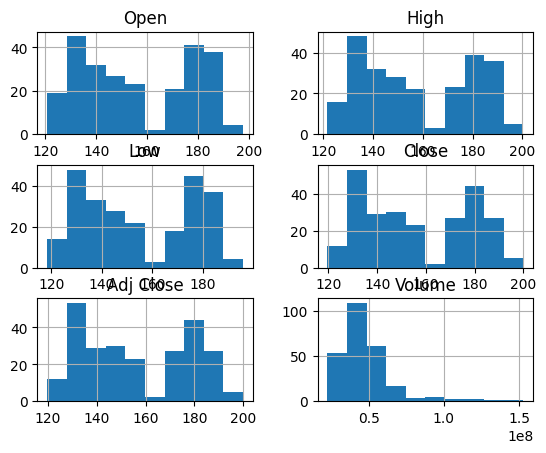

In [39]:
df.hist()